# Descriptive statistics

In [9]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset("penguins")
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


## Measures of Centrality

There are three measures of centrality:

* mean (standard)
* median (less susceptible to outliers)
* mode

Columns of pandas DataFrames have the same name:

In [3]:
df["bill_length_mm"].mean()

np.float64(43.9219298245614)

In [5]:
# convenience function for multiple metrics
df["bill_length_mm"].describe()

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [6]:
# even more convenient
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Measures of Dispersion
* standard deviation
* min, max
* range
* quartiles / percentiles
* Interquartile Range (IQR, range from 25th to 75th percentile)

In [7]:
# standard dev also reacts to outliers a lot
df["bill_length_mm"].std()

np.float64(5.4595837139265315)

For a single column, one would typically use a histogram to analyze the dispersion and find out what type of distribution (normal, uniform, geometrical or something else). However, with smaller sample sizes the interpretation can be tricky. The bin size matters a lot and still is likely to produce numerical artifacts.

Here is a luckier outcome:

<Axes: >

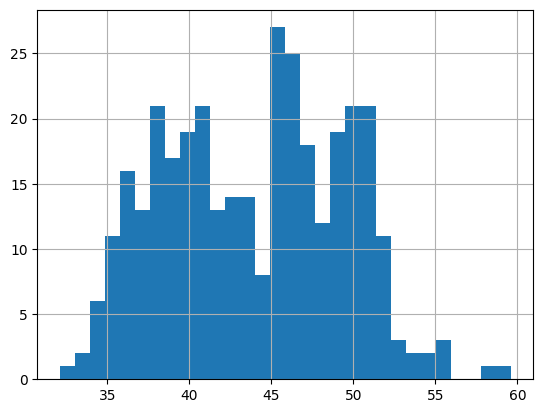

In [8]:
df["bill_length_mm"].hist(bins=30)

### Pivot Tables

Pivot tables are one of the main tools to summarize data. You need:

- 1 or 2 categorical columns
- 1 numerical column
- an aggregation function

The `pd.pivot_table()` function is convenient to use. It achieves something very similar to the GROUP BY in SQL. In fact a `group_by()` exists in pandas, but the syntax is more complex and only worth for trickier cases. Most of the time, you get away with using one of 7 standard aggregations: `count`, `sum`, `min`, `max`, `mean`, `median`, `std`.'

In [10]:
# simple pivot with 1 category, 1 value column, 1 aggregation function
pd.pivot_table(data=df, index="species", values="bill_length_mm", aggfunc="mean").round(2)

,bill_length_mm
species,
Adelie,38.79
Chinstrap,48.83
Gentoo,47.50


<Axes: xlabel='species'>

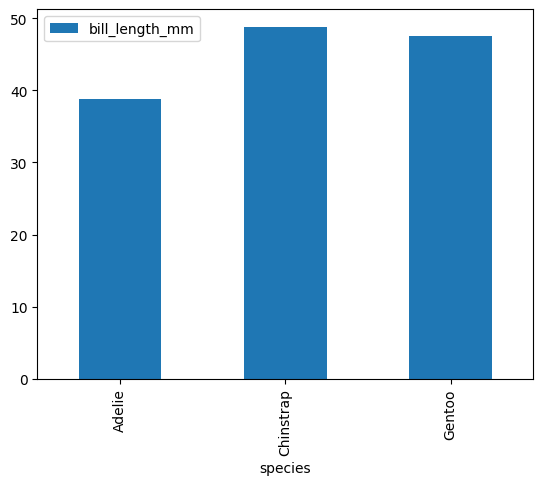

In [11]:
# pivots make easy bar plots
pd.pivot_table(data=df, index="species", values="bill_length_mm", aggfunc="mean").plot.bar()

### Define custom aggregation functions

In [12]:
def fortytwo(x):
    return 42

def stalin_aggregate(x):
    # eliminate first 10 values, then sum
    return x[10:].sum()

In [13]:
pd.pivot_table(data=df, index="species", values="bill_length_mm", aggfunc=stalin_aggregate)

,bill_length_mm
species,
Adelie,5508.4
Chinstrap,2834.9
Gentoo,5372.0


### Pivot with two categories

In [28]:
# pivot with two categories, 1 value column and 1 aggregation function
pd.pivot_table(data=df, index="species", columns="sex",
               values="bill_length_mm", aggfunc="mean").round(2)

sex,Female,Male
species,,
Adelie,37.26,40.39
Chinstrap,46.57,51.09
Gentoo,45.56,49.47


<Axes: xlabel='species'>

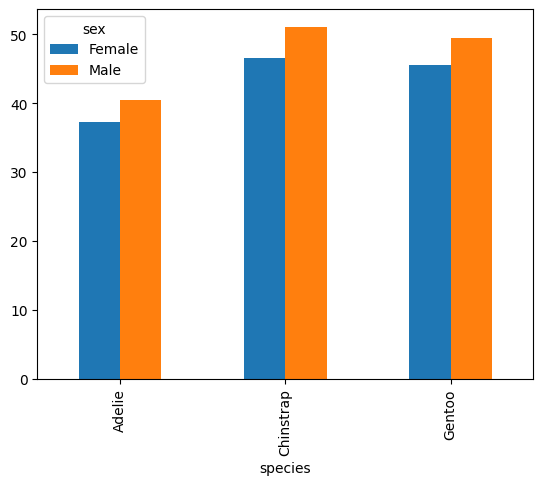

In [31]:
pd.pivot_table(data=df, index="species", columns="sex",
               values="bill_length_mm", aggfunc="mean").plot.bar()

### Normalizing pivot tables

In [16]:
ct = pd.pivot_table(data=df, index="species", columns="sex",
               values="bill_length_mm", aggfunc="count")
ct

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [20]:
# divide by the column sum -> percentage per columbn
(100 * ct / ct.sum()).round(1)

sex,Female,Male
species,,
Adelie,44.2,43.5
Chinstrap,20.6,20.2
Gentoo,35.2,36.3


In [19]:
# divide by the grand total (sum of sums) -> overall percentage
(100 * ct / ct.sum().sum()).round(1)

sex,Female,Male
species,,
Adelie,21.9,21.9
Chinstrap,10.2,10.2
Gentoo,17.4,18.3
